In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sympy as sp
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

(-0.5, 853.5, 509.5, -0.5)

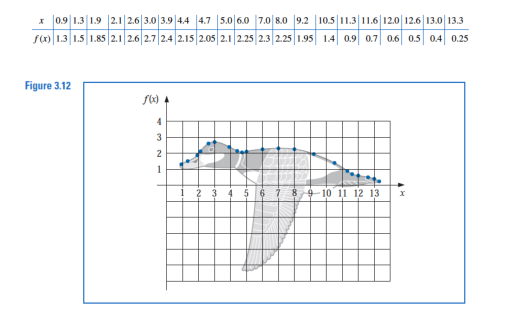

In [ ]:
imagen = mpimg.imread("Fig.png") # en archivos

plt.imshow(imagen)
plt.axis("off")

In [62]:
x= np.array([0.9, 1.3, 1.9, 2.1, 2.6,3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
f= np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

In [4]:
x_s= sp.Symbol("x")
x_s

x

In [36]:
def Lagrange(j,x):
  l_n=1

  # Params = Polinomio de Lagrange j-esimo
  # n = Número de puntos
  # x = Puntos a interpolar

  for i in range(0,(len(x))):
    if (i!=j):
     l_n*=(x_s-x[i])/(x[j]-x[i])
  return l_n


In [37]:
l_n= Lagrange(0,x)
l_n

(1.07258064516129 - 0.0806451612903226*x)*(1.07438016528926 - 0.0826446280991736*x)*(1.07692307692308 - 0.0854700854700855*x)*(1.08108108108108 - 0.0900900900900901*x)*(1.08411214953271 - 0.0934579439252337*x)*(1.08653846153846 - 0.0961538461538461*x)*(1.09375 - 0.104166666666667*x)*(1.10843373493976 - 0.120481927710843*x)*(1.12676056338028 - 0.140845070422535*x)*(1.14754098360656 - 0.163934426229508*x)*(1.17647058823529 - 0.196078431372549*x)*(1.21951219512195 - 0.24390243902439*x)*(1.23684210526316 - 0.263157894736842*x)*(1.25714285714286 - 0.285714285714286*x)*(1.3 - 0.333333333333333*x)*(1.42857142857143 - 0.476190476190476*x)*(1.52941176470588 - 0.588235294117647*x)*(1.75 - 0.833333333333333*x)*(1.9 - 1.0*x)*(3.25 - 2.5*x)

In [38]:
# Polinomio de Lagrange

def P(x_s,x,f):
  poly=0
  for i in range (0,len(f)):
    poly+= f[i]*Lagrange(i,x)
  return poly

In [ ]:
P(x_s,x,f)

In [42]:
sp.simplify(P(x_s,x,f))

-3.07453078010797e-11*x**20 + 4.27948927144613e-9*x**19 - 2.77283085046596e-7*x**18 + 1.11075895423632e-5*x**17 - 0.000308159189308447*x**16 + 0.00628589966751677*x**15 - 0.0976903800730421*x**14 + 1.18284031649904*x**13 - 11.3160515558666*x**12 + 86.251397992484*x**11 - 525.812753506655*x**10 + 2564.201308196*x**9 - 9968.97885733076*x**8 + 30677.6349740655*x**7 - 73866.5656784605*x**6 + 136777.900226631*x**5 - 189850.972861702*x**4 + 189994.993238066*x**3 - 128683.405779068*x**2 + 52462.5803287026*x - 9652.78507912494

In [57]:
polinomio = lambda x_s: P(x_s, x, f)

In [58]:
# Generamos puntos para graficar el polinomio
x_plot = np.linspace(min(x), max(x), 100)
y_plot = polinomio(x_plot)

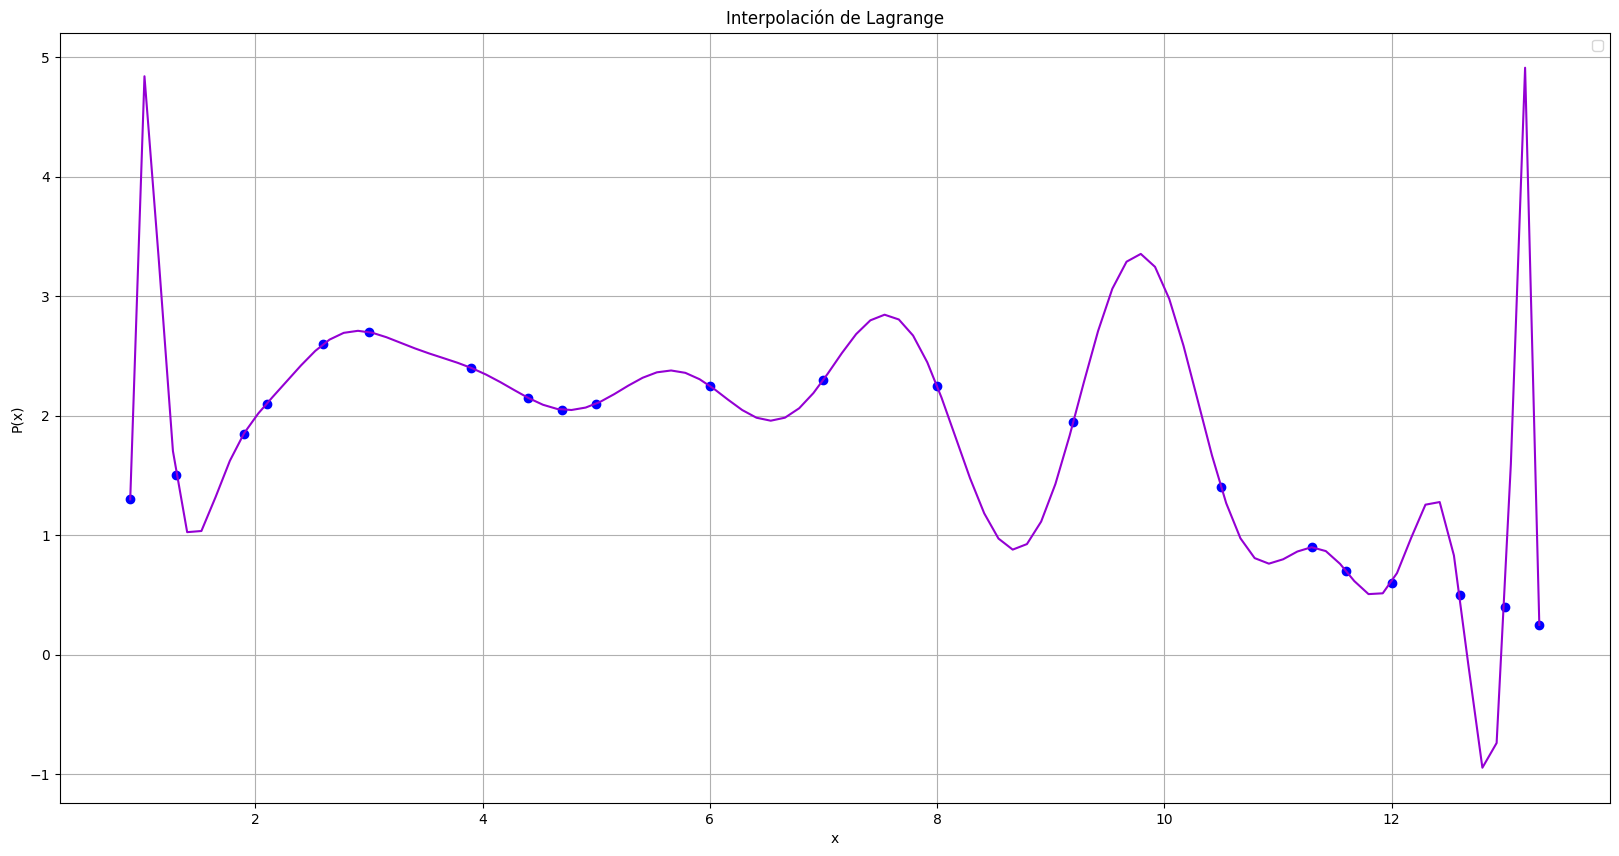

In [67]:
plt.figure(figsize=(20, 10))
plt.plot(x, f, "bo")
plt.plot(x_plot, y_plot, c="darkviolet")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("Interpolación de Lagrange")
plt.legend()
plt.grid()

In [27]:
min_ = min(len(x), len(f))
x = x[:min_]
f = f[:min_]

In [24]:
cubic_spline = CubicSpline(x, f)

In [25]:
x_eval = np.linspace(min(x), max(x), 100)
f_eval = cubic_spline(x_eval)

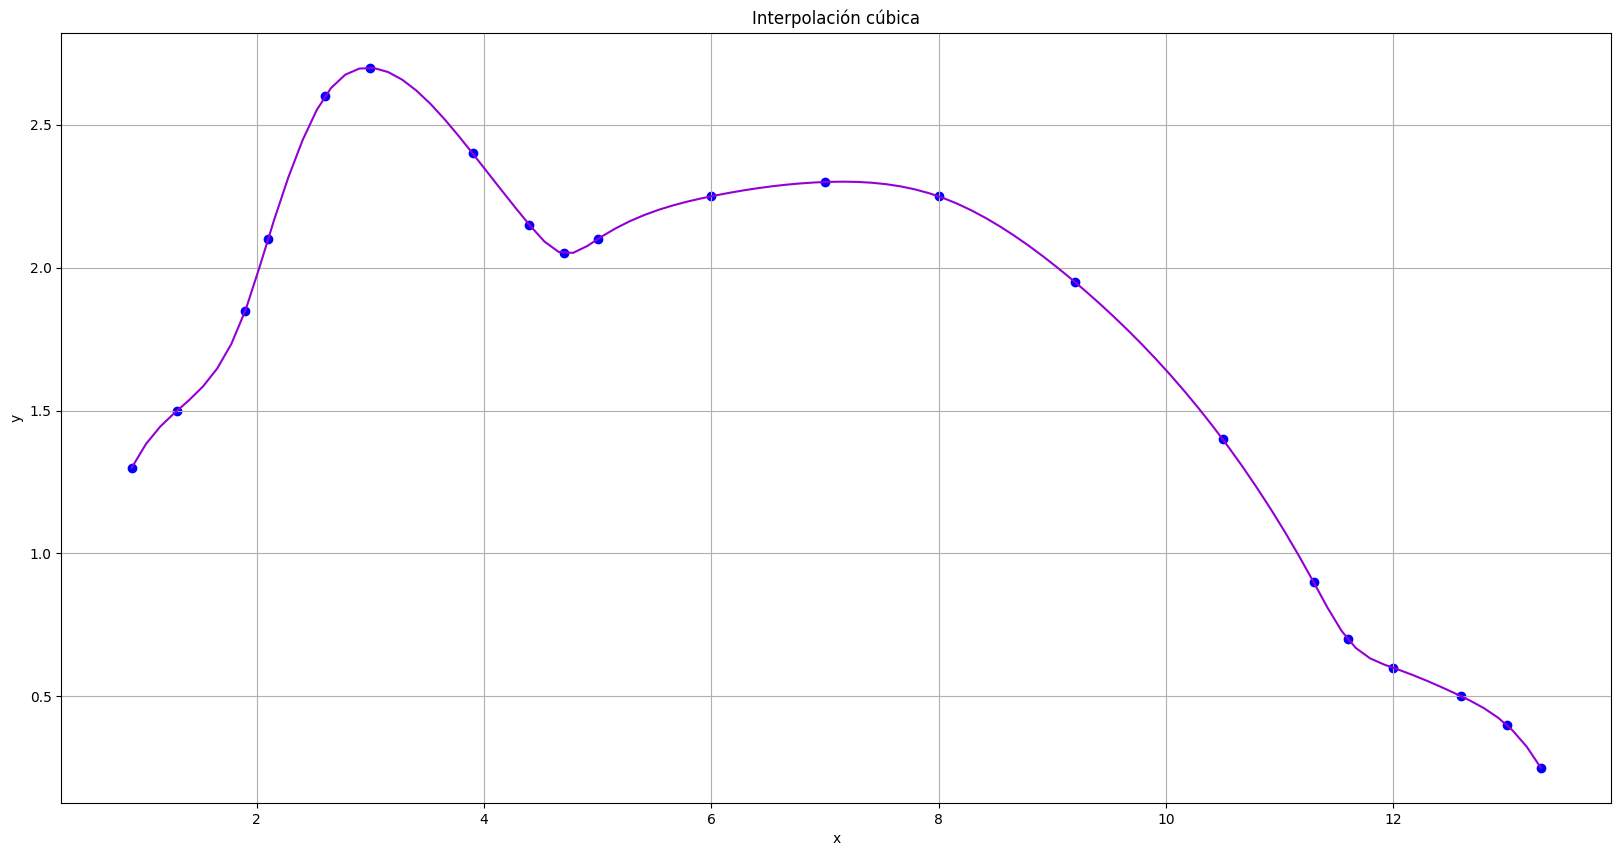

In [65]:
plt.figure(figsize=(20, 10))
plt.scatter(x,f,color="b")
plt.plot(x_eval, f_eval, color="darkviolet")
plt.title("Interpolación cúbica")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

* La interpolación de lagrange es la que presenta ciertas
oscilaciones y se podría deber a que el polinomio obtenido es de un grado muy alto y no se logra acomodar "suavemente" cuando pasa por cada punto, sino que salta en valores intermedios.

* Mientras que la interpolación cúbica pasa por todos los puntos, ya que la curva es más "suave".